In [1]:
import os
from mayavi import mlab
from mayavi.sources.api import VTKFileReader
from mayavi.sources.vtk_data_source import VTKDataSource
from mayavi.core.api import Engine
from mayavi.scripts import mayavi2
import numpy as np
from tvtk.api import tvtk
from mayavi.modules.surface import Surface
from vtk import *

In [2]:
# define the file name
filename=os.path.join(os.getcwd(),'cavity/VTK/cavity_100.vtk')

In [3]:
# read results
reader = vtkUnstructuredGridReader()
reader.SetFileName(filename)
reader.Update()

In [5]:
# create vtkUnstructuredGrid object
data = reader.GetOutput()

In [6]:
# get point data
points = data.GetPoints()
points_data = data.GetPointData()
pressure = points_data.GetArray(0)
velocity = points_data.GetArray(1)

In [26]:
# convert vtk arrays to numpy
from vtk.util import numpy_support
np_points = numpy_support.vtk_to_numpy(points.GetData())
np_pressure = numpy_support.vtk_to_numpy(pressure)
np_velocity = numpy_support.vtk_to_numpy(velocity)

In [105]:
# get cell data
cellTypes = data.GetCellTypesArray()
cells_data = data.GetCellData()
cells = data.GetCells()
cellsLocArray = data.GetCellLocationsArray()

In [106]:
# create mayavi source via tvtk
ug = tvtk.UnstructuredGrid(points = points)
ug.set_cells(cellTypes,cellsLocArray,cells)

In [129]:
# get maximum and minimum of pressure values
print(np.amax(np_pressure),np.amin(np_pressure))

(0.76571798, -0.59403098)


In [159]:
# initialize the notebook window with png backend (x3d doesn't work at the moment, so no interactivity)
mlab.init_notebook(backend='png',local=True,width=700,height=700)
fig = mlab.figure()

Notebook initialized with png backend.


In [160]:
# add source to the pipeline
src = mlab.pipeline.add_dataset(ug)
# create cut plane normal to Z axis
cut = mlab.pipeline.scalar_cut_plane(src,plane_orientation='z_axes',view_controls=False,vmax=0.7,vmin=-0.5)
# assign pressure scalar data
ug.point_data.scalars = np_pressure
ug.point_data.scalars.name = 'pressure'

In [161]:
# adjust view
mlab.view(azimuth=0,elevation=0,distance=0.25,focalpoint=[0.05,0.04,0.005])

(0.0, 0.0, 0.25, array([ 0.05 ,  0.05 ,  0.005]))


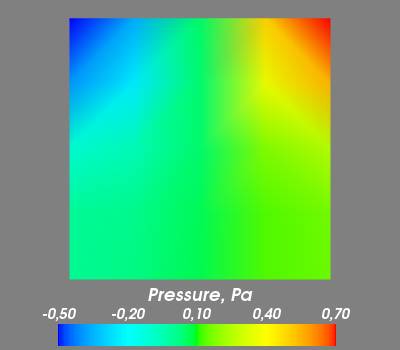

In [162]:
# add scalarbar
mlab.scalarbar(orientation='horizontal',title='Pressure, Pa',label_fmt='%.2f',nb_labels=5)
# activate figure
fig

In [ ]:
mlab.init_notebook(backend='png',local=True,width=700,height=700)
fig = mlab.figure()

In [ ]:
# The second way - just open vtk file via mlab functionality
src = mlab.pipeline.open('./cavity/VTK/cavity_100.vtk')

o = mlab.pipeline.outline(src)
#cut = mlab.pipeline.scalar_cut_plane(src)
#iso = mlab.pipeline.iso_surface(src)

In [ ]:
fig